## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

C:\Users\neeha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_train.shape

(60000, 28, 28)

### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape[0]

60000

In [4]:
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [5]:
x_train[0].shape

(28, 28)

In [6]:
#or
x_train.shape[1:]

(28, 28)

In [7]:
x_test[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [8]:
import pandas as pd
import numpy as np

In [9]:
pd.Series(y_test).value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [10]:
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [11]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
y_train.shape

(60000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [16]:
x_test=x_test.astype('float32')

In [17]:
x_train=x_train.astype('float32')

In [18]:
x_train /= 255 #Done for normalization of data, 
x_test /= 255


In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train.dtype

dtype('float32')

In [21]:
x_test.dtype

dtype('float32')

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [22]:
x_train=x_train.reshape(60000,28,28,1)

In [23]:
x_test=x_test.reshape(10000,28,28,1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [30]:
import keras

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [37]:

    # Define model
model2 = Sequential()

    # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1))) #Convolution 2d how many dimentions do we need to filter
    # 32 number of filters, 3*3 filter and depth is 1 as our input is 28*28*1
    #Convolution3D will default the filter to depth 3
model2.add(Activation('relu'))

    # 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

    # Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

    # Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

    # Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':


In [38]:
# Train the model2 
BATCH_SIZE = 500
model2.fit(x_train, y_train, batch_size=1000, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    

C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.6676 - acc: 0.7701 - val_loss: 0.4365 - val_acc: 0.8434
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3616 - acc: 0.8720 - val_loss: 0.3574 - val_acc: 0.8708
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.3068 - acc: 0.8913 - val_loss: 0.3199 - val_acc: 0.8852
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2733 - acc: 0.9016 - val_loss: 0.3264 - val_acc: 0.8796
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2524 - acc: 0.9091 - val_loss: 0.3154 - val_acc: 0.8860
Epoch 6/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2325 - acc: 0.9165 - val_loss: 0.2922 - val_acc: 0.8942
Epoch 7/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2131 - acc: 0.9226 - val_loss: 0.2660 - val_acc

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [34]:

    # Define model
model2 = Sequential()

    # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1))) #Convolution 2d how many dimentions do we need to filter
    # 32 number of filters, 3*3 filter and depth is 1 as our input is 28*28*1
    #Convolution3D will default the filter to depth 3
model2.add(Activation('relu'))

    # 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))
# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
model2.add(Dropout(0.25))


    # Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

    # Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

    # Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':


In [35]:
# Train the model2 
BATCH_SIZE = 500
model2.fit(x_train, y_train, batch_size=500, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    

C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.6114 - acc: 0.7850 - val_loss: 0.4151 - val_acc: 0.8541
Epoch 2/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3672 - acc: 0.8697 - val_loss: 0.3665 - val_acc: 0.8685
Epoch 3/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.3157 - acc: 0.8872 - val_loss: 0.3132 - val_acc: 0.8879
Epoch 4/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2853 - acc: 0.8970 - val_loss: 0.2862 - val_acc: 0.8975
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2634 - acc: 0.9044 - val_loss: 0.2791 - val_acc: 0.8993
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2383 - acc: 0.9137 - val_loss: 0.2567 - val_acc: 0.9072
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2233 - acc: 0.9204 - val_loss: 0.2627 - val_acc

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [39]:
from keras.preprocessing.image import ImageDataGenerator #performs realtime image augmentation 

In [40]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images
#helps managing memory, less memory needed...but only use if there is less data...

In [44]:
# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

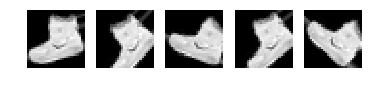

In [45]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [51]:
training_set = datagen.flow(x_train,y_train,batch_size = 32)

In [53]:
test_set = datagen.flow(x_test,y_test, batch_size = 32)



In [55]:
model2.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 10,
                         validation_data = test_set,
                         nb_val_samples = 2000)

Epoch 1/10
  1/250 [..............................] - ETA: 25s - loss: 0.6545 - acc: 0.7500

C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=250, epochs=10, validation_steps=2000)`
  """


250/250 [==============================] - 51s 203ms/step - loss: 0.7333 - acc: 0.7243 - val_loss: 0.7113 - val_acc: 0.7380
Epoch 2/10
250/250 [==============================] - 53s 211ms/step - loss: 0.6786 - acc: 0.7483 - val_loss: 0.6574 - val_acc: 0.7514
Epoch 3/10
250/250 [==============================] - 51s 204ms/step - loss: 0.6463 - acc: 0.7586 - val_loss: 0.6253 - val_acc: 0.7667
Epoch 4/10
250/250 [==============================] - 50s 202ms/step - loss: 0.5968 - acc: 0.7705 - val_loss: 0.6090 - val_acc: 0.7728
Epoch 5/10
250/250 [==============================] - 49s 198ms/step - loss: 0.5952 - acc: 0.7781 - val_loss: 0.5844 - val_acc: 0.7826
Epoch 6/10
250/250 [==============================] - 50s 200ms/step - loss: 0.5811 - acc: 0.7772 - val_loss: 0.5725 - val_acc: 0.7862
Epoch 7/10
250/250 [==============================] - 49s 198ms/step - loss: 0.5546 - acc: 0.7889 - val_loss: 0.5678 - val_acc: 0.7874
Epoch 8/10
250/250 [==============================] - 50s 201ms/st

###  Report the final train and validation accuracy

In [64]:
Metrics=model2.evaluate(x_test,y_test)
print("Loss and Accuracy is", Metrics)

10000/10000 [==============================] - 4s 421us/step
Loss and Accuracy is [0.44568429596424103, 0.8385]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [65]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [66]:
(x_train_cif, y_train_cif), (x_test_cif, y_test_cif) = cifar10.load_data()

170500096/170498071 [==============================] - 367s 2us/step


In [68]:
print('--- THE DATA ---')
print('x_train shape:', x_train_cif.shape)
print(x_train_cif.shape[0], 'train samples')
print(x_test_cif.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [69]:
y_train_cif.shape

(50000, 1)

In [71]:
#Prep the Data
x_train = x_train_cif.astype('float32')
x_test = x_test_cif.astype('float32')
x_train /= 255
x_test /= 255

In [72]:
np.unique(y_train_cif)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [73]:
y_train_cat = keras.utils.to_categorical(y_train_cif, 10) #converts to 10 categorical variable
y_test_cat = keras.utils.to_categorical(y_test_cif, 10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [74]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images
#helps managing memory, less memory needed...but only use if there is less data...

### **Prepare/fit the generator.**

In [75]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

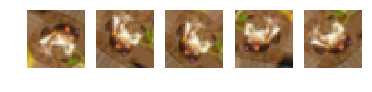

In [76]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()